In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [7]:
img_dir = 'C:\Aaishni Study Courses\IIT Bombay courses\D-E placement courses\Data Science\Covid 19 detection using CT scans Project\Project\covid data'

In [3]:
BATCH_SIZE = 128 
IMAGE_SIZE = 128 
input_shape = (128,128,1)

In [5]:
data_gen = ImageDataGenerator(rescale=1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              validation_split = 0.2)

In [8]:
train_gen = data_gen.flow_from_directory(img_dir,
                                         target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                         batch_size = BATCH_SIZE,
                                         color_mode = 'grayscale',
                                         shuffle = True,
                                         class_mode = 'binary',
                                         subset = 'training')

Found 6752 images belonging to 2 classes.


In [9]:
val_gen = data_gen.flow_from_directory(img_dir,
                                       target_size = (IMAGE_SIZE,IMAGE_SIZE),
                                       batch_size = BATCH_SIZE,
                                       color_mode = 'grayscale',
                                       shuffle = True,
                                       class_mode = 'binary',
                                       subset = 'validation')

Found 1687 images belonging to 2 classes.


In [10]:
labels = train_gen.class_indices
classes = list(labels.keys())
print(classes)

['covid', 'non-covid']


In [11]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout

In [12]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 306,673 (1.17 MB)

 Trainable params: 306,673 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
len(train_gen), len(val_gen)

(53, 14)

In [19]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=9,validation_data=val_gen,steps_per_epoch=len(train_gen),validation_steps=len(val_gen))

Epoch 1/9


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9579 - loss: 0.1175 - val_accuracy: 0.9075 - val_loss: 0.2873
Epoch 2/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/9


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.9624 - loss: 0.1094 - val_accuracy: 0.9212 - val_loss: 0.2459
Epoch 4/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9717 - loss: 0.0889 - val_accuracy: 0.9259 - val_loss: 0.2219
Epoch 6/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9667 - loss: 0.0959 - val_accuracy: 0.9277 - val_loss: 0.2462
Epoch 8/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/9
53/53 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9764 - loss: 0.0688 - val_accuracy: 0.9229 - val_loss: 0.2253


<Axes: >

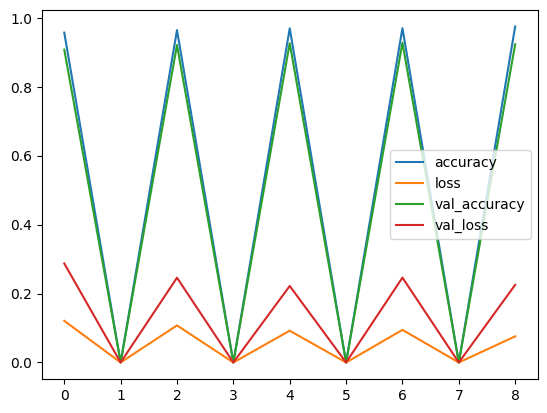

In [20]:
pd.DataFrame(history.history).plot()

In [18]:
history.history

{'accuracy': [0.8804798722267151,
  0.0,
  0.9080272316932678,
  0.0,
  0.9352784156799316,
  0.0,
  0.9380924105644226,
  0.0,
  0.9456457495689392,
  0.0],
 'loss': [0.36510419845581055,
  0.0,
  0.24830499291419983,
  0.0,
  0.18787918984889984,
  0.0,
  0.16395558416843414,
  0.0,
  0.14756226539611816,
  0.0],
 'val_accuracy': [0.8885595798492432,
  0.0,
  0.9016004800796509,
  0.0,
  0.9045643210411072,
  0.0,
  0.8867812752723694,
  0.0,
  0.9116775393486023,
  0.0],
 'val_loss': [0.29706892371177673,
  0.0,
  0.24449418485164642,
  0.0,
  0.2659837603569031,
  0.0,
  0.26844796538352966,
  0.0,
  0.2576804459095001,
  0.0]}